<a href="https://colab.research.google.com/github/Fri21/Proyecto-Spotify/blob/main/regresi%C3%B3nlinealP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Autenticar con Google Cloud
from google.colab import auth
auth.authenticate_user()
# Importa la biblioteca bigquery del paquete google.cloud
from google.cloud import bigquery
import pandas as pd
# Declarar el proyecto, dataset y tabla
project_id = "proyecto-hipotesis-spotify"
dataset = "dataset_spotify"
table = "dataset_spotify_03"
# Configurar el cliente de BigQuery con el ID del proyecto
client = bigquery.Client(project=project_id)
# Ejecutar la Consulta en BigQuery
query = f"""
SELECT *
FROM `{project_id}.{dataset}.{table}`
"""


# Ejecutar la consulta y convertir los resultados en un DataFrame de pandas
df = client.query(query).to_dataframe()


# Mostrar las primeras filas del DataFrame
print(df.head())

  track_id track_name_limpio artist_name_limpio release_date  released_year  \
0  1406287  I Wanna Be Yours     Arctic Monkeys   2013-01-01           2013   
1  3921634       Blank Space       Taylor Swift   2014-01-01           2014   
2  4796316             Style       Taylor Swift   2014-01-01           2014   
3  4527090            Yellow      Chris Molitor   1999-01-01           1999   
4  3126367      Viva La Vida           Coldplay   2008-01-01           2008   

   artist_count  in_spotify_playlists  in_spotify_charts  streams_limpio  bpm  \
0             1                 12859                110      1297026226  135   
1             1                 11434                 53      1355959075   96   
2             1                  7830                 42       786181836   95   
3             1                 31358                 43      1755214421  173   
4             1                 33898                 62      1592909789  138   

   ...  total_playlist  cat_streams  c

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Number of samples in X: 948, Number of samples in Y: 948
Error Cuadrático Medio (MSE): 3.2250610791137446e+17
Coeficiente de Determinación (R²): -0.0015182349931315287


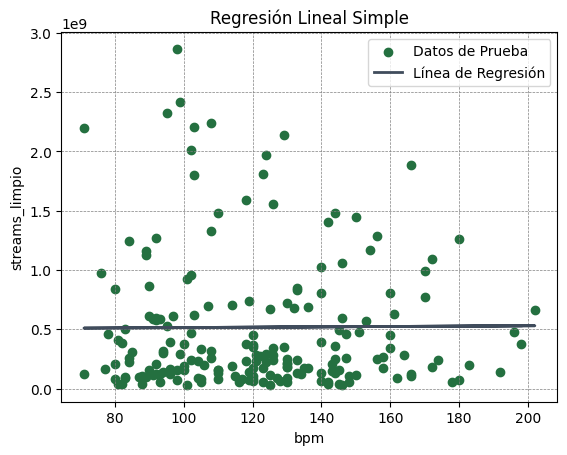


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[150426.92536367]
Valor de la intersección o coeficiente "b":
499205641.55513316

La ecuación del modelo es igual a:
y = a * x + b
y = [150426.92536367] * x + 499205641.55513316
Precisión del modelo:
5.45163435813345e-05


In [4]:
# Definir las columnas para X y Y para H1 BPM vs Streams
X_column = 'bpm'
Y_column = 'streams_limpio'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#247040', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='#404c5c', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()
# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

Number of samples in X: 948, Number of samples in Y: 948
Error Cuadrático Medio (MSE): 197.0692889534676
Coeficiente de Determinación (R²): 0.3587687797536585


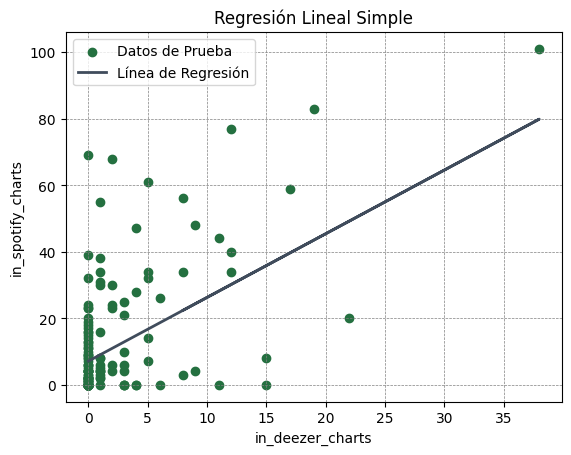


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[1.91433553]
Valor de la intersección o coeficiente "b":
7.108751790498742

La ecuación del modelo es igual a:
y = a * x + b
y = [1.91433553] * x + 7.108751790498742
Precisión del modelo:
0.364264112470829


In [5]:
# Definir las columnas para X y Y para H2 Ranking Deezer vs Ranking Spotify
X_column = 'in_deezer_charts'
Y_column = 'in_spotify_charts'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#247040', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='#404c5c', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()
# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

Number of samples in X: 948, Number of samples in Y: 948
Error Cuadrático Medio (MSE): 1.1206677368962085e+17
Coeficiente de Determinación (R²): 0.651985141881881


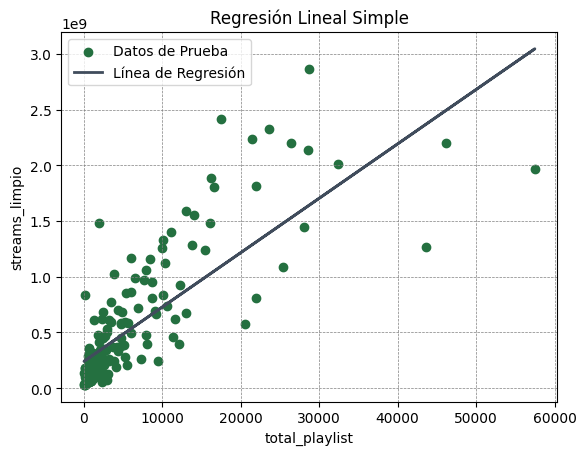


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[48840.93050672]
Valor de la intersección o coeficiente "b":
238843843.32596415

La ecuación del modelo es igual a:
y = a * x + b
y = [48840.93050672] * x + 238843843.32596415
Precisión del modelo:
0.6034751883410217


In [6]:
# Definir las columnas para X y Y para H3 Total Playlist vs Streams
X_column = 'total_playlist'
Y_column = 'streams_limpio'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#247040', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='#404c5c', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()
# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

Number of samples in X: 948, Number of samples in Y: 948
Error Cuadrático Medio (MSE): 3.1371548791382e+17
Coeficiente de Determinación (R²): 0.025780368067327086


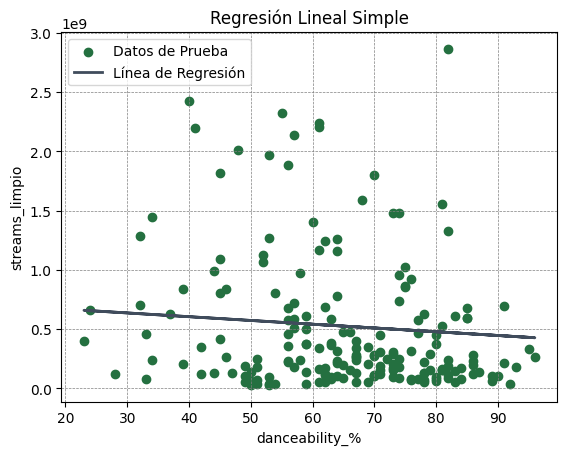


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[-3169635.14703584]
Valor de la intersección o coeficiente "b":
731506131.1993654

La ecuación del modelo es igual a:
y = a * x + b
y = [-3169635.14703584] * x + 731506131.1993654
Precisión del modelo:
0.006503345060304588


In [7]:
# Definir las columnas para X y Y para H5 Danceability vs Streams
X_column = 'danceability_%'
Y_column = 'streams_limpio'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#247040', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='#404c5c', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()
# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

Number of samples in X: 948, Number of samples in Y: 948
Error Cuadrático Medio (MSE): 3.15823133767746e+17
Coeficiente de Determinación (R²): 0.01923523387038162


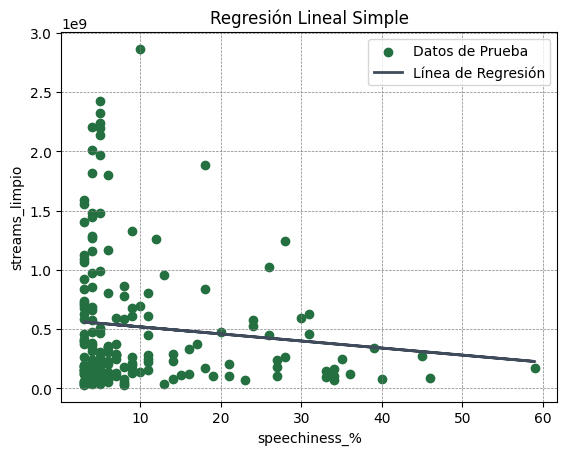


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[-5961505.17537875]
Valor de la intersección o coeficiente "b":
578589267.0032768

La ecuación del modelo es igual a:
y = a * x + b
y = [-5961505.17537875] * x + 578589267.0032768
Precisión del modelo:
0.010764835790606275


In [8]:
# Definir las columnas para X y Y para H5 Speechines vs Streams
X_column = 'speechiness_%'
Y_column = 'streams_limpio'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#247040', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='#404c5c', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()
# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

Number of samples in X: 948, Number of samples in Y: 948
Error Cuadrático Medio (MSE): 15948251.10712739
Coeficiente de Determinación (R²): 0.720689495011677


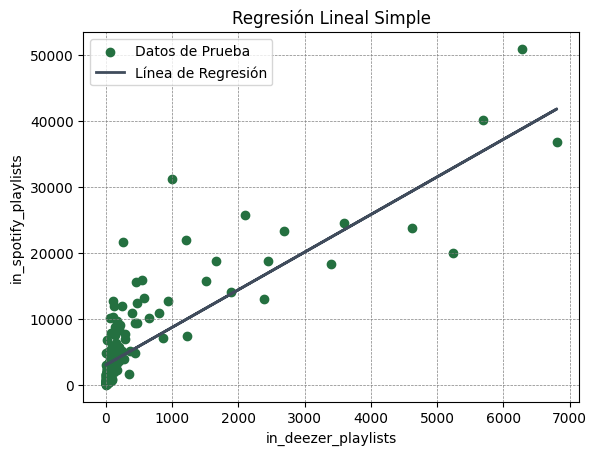


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[5.69196702]
Valor de la intersección o coeficiente "b":
3026.612257186961

La ecuación del modelo es igual a:
y = a * x + b
y = [5.69196702] * x + 3026.612257186961
Precisión del modelo:
0.6744975223985538


In [9]:
# Definir las columnas para X y Y para H6 Playlists Deezer vs Playlists Spotify
X_column = 'in_deezer_playlists'
Y_column = 'in_spotify_playlists'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#247040', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='#404c5c', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()
# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))

In [12]:
# Declarar el proyecto, dataset y tabla
project_id = "proyecto-hipotesis-spotify"
dataset = "dataset_spotify"
table = "canciones_solistas_streams"
# Configurar el cliente de BigQuery con el ID del proyecto
client = bigquery.Client(project=project_id)
# Ejecutar la Consulta en BigQuery
query = f"""
SELECT *
FROM `{project_id}.{dataset}.{table}`
"""


# Ejecutar la consulta y convertir los resultados en un DataFrame de pandas
df = client.query(query).to_dataframe()


# Mostrar las primeras filas del DataFrame
print(df.head())

  artist_name_limpio  total_canciones  total_streams
0            G I DLE                2      266983330
1            50 Cent                1     1202722675
2              Adele                4     4508746590
3          Aerosmith                1      838586769
4            Agust D                1      118810253


Number of samples in X: 301, Number of samples in Y: 301
Error Cuadrático Medio (MSE): 8.499539212865327e+17
Coeficiente de Determinación (R²): -0.05365473660685227


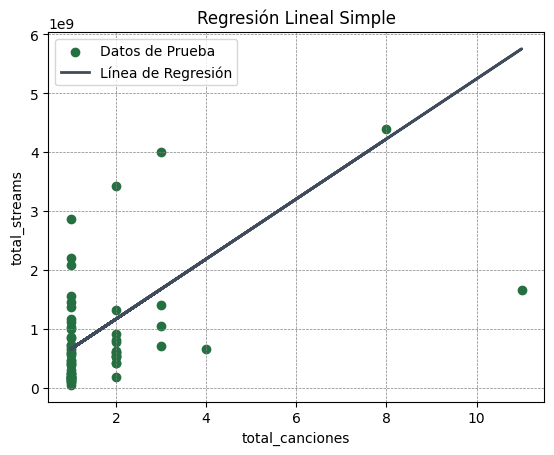


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[5.10252078e+08]
Valor de la intersección o coeficiente "b":
142959765.21016335

La ecuación del modelo es igual a:
y = a * x + b
y = [5.10252078e+08] * x + 142959765.21016335
Precisión del modelo:
0.6752011781911222


In [13]:
# Definir las columnas para X y Y para H6 Playlists Deezer vs Playlists Spotify
X_column = 'total_canciones'
Y_column = 'total_streams'

# Eliminar filas con valores faltantes en X o Y
df_clean = df.dropna(subset=[X_column, Y_column])

# Extraer los datos correspondientes después de eliminar valores faltantes
X = df_clean[[X_column]]
Y = df_clean[Y_column]

# Asegurarse de que X y Y tengan el mismo número de filas
print(f"Number of samples in X: {len(X)}, Number of samples in Y: {len(Y)}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print('Error Cuadrático Medio (MSE):', mse)

r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de Determinación (R²):', r2)

# Visualizar la línea de regresión
plt.scatter(X_test, Y_test, color='#247040', label='Datos de Prueba')
plt.plot(X_test, Y_pred, color='#404c5c', linewidth=2, label='Línea de Regresión')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()
# Datos del modelo de Regresión Lineal Simple
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(model.coef_)
print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = a * x + b')
print('y =', model.coef_, '* x +', model.intercept_)
print('Precisión del modelo:')
print(model.score(X_train, Y_train))